1. Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('S&P 500 Historical Data 2018 to 2022.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2021-12-31,12/31/2021,"4,766.18","4,775.21","4,786.83","4,765.75",NaN,-0.26%
2021-12-30,12/30/2021,"4,778.73","4,794.23","4,808.93","4,775.33",NaN,-0.30%
2021-12-29,12/29/2021,"4,793.06","4,788.64","4,804.06","4,778.08",NaN,0.14%
2021-12-28,12/28/2021,"4,786.36","4,795.49","4,807.02","4,780.04",NaN,-0.10%
2021-12-27,12/27/2021,"4,791.19","4,733.99","4,791.49","4,733.99",NaN,1.38%


In [3]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2018-01-08,01/08/2018,"2,747.71","2,742.67","2,748.51","2,737.60",NaN,0.17%
2018-01-05,01/05/2018,"2,743.15","2,731.33","2,743.45","2,727.92",NaN,0.70%
2018-01-04,01/04/2018,"2,723.99","2,719.31","2,729.29","2,719.07",NaN,0.40%
2018-01-03,01/03/2018,"2,713.06","2,697.85","2,714.37","2,697.77",NaN,0.64%
2018-01-02,01/02/2018,"2,695.81","2,683.73","2,695.89","2,682.36",NaN,0.83%


2.Data Cleaning & Preparation

In [4]:
#add a column for Close and fill it with Open Column starting from 2nd row
df['Close'] = df['Open']
df['Close'] = df['Close'].shift(-1)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,,
2021-12-31,12/31/2021,"4,766.18","4,775.21","4,786.83","4,765.75",NaN,-0.26%,"4,794.23"
2021-12-30,12/30/2021,"4,778.73","4,794.23","4,808.93","4,775.33",NaN,-0.30%,"4,788.64"
2021-12-29,12/29/2021,"4,793.06","4,788.64","4,804.06","4,778.08",NaN,0.14%,"4,795.49"
2021-12-28,12/28/2021,"4,786.36","4,795.49","4,807.02","4,780.04",NaN,-0.10%,"4,733.99"
2021-12-27,12/27/2021,"4,791.19","4,733.99","4,791.49","4,733.99",NaN,1.38%,"4,703.96"


In [5]:
df.tail()
#observed that last row has NaN value in Close column

#so we will drop the last row
df = df.drop(df.index[-1])
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,,
2018-01-09,01/09/2018,"2,751.29","2,751.15","2,759.14","2,747.86",NaN,0.13%,"2,742.67"
2018-01-08,01/08/2018,"2,747.71","2,742.67","2,748.51","2,737.60",NaN,0.17%,"2,731.33"
2018-01-05,01/05/2018,"2,743.15","2,731.33","2,743.45","2,727.92",NaN,0.70%,"2,719.31"
2018-01-04,01/04/2018,"2,723.99","2,719.31","2,729.29","2,719.07",NaN,0.40%,"2,697.85"
2018-01-03,01/03/2018,"2,713.06","2,697.85","2,714.37","2,697.77",NaN,0.64%,"2,683.73"


In [6]:
#create a new column for the difference between the high and low price
df['High-Low'] = df['High'] - df['Low']

#create a new column for the difference between the open and close price
df['Open-Close'] = df['Open'] - df['Close']


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [7]:
#conver columns Price, Open, High, Low to float
df['Price'] = df['Price'].str.replace(',','').astype(float)
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['Close'] = df['Close'].str.replace(',','').astype(float)
df['High'] = df['High'].str.replace(',','').astype(float)
df['Low'] = df['Low'].str.replace(',','').astype(float)


In [8]:
#now,try again
#create a new column for the difference between the high and low price
df['High-Low'] = df['High'] - df['Low']

#create a new column for the difference between the open and close price
df['Open-Close'] = df['Open'] - df['Close']

In [9]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close
Date,,,,,,,,,,
2021-12-31,12/31/2021,4766.18,4775.21,4786.83,4765.75,NaN,-0.26%,4794.23,21.08,-19.02
2021-12-30,12/30/2021,4778.73,4794.23,4808.93,4775.33,NaN,-0.30%,4788.64,33.60,5.59
2021-12-29,12/29/2021,4793.06,4788.64,4804.06,4778.08,NaN,0.14%,4795.49,25.98,-6.85
2021-12-28,12/28/2021,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%,4733.99,26.98,61.50
2021-12-27,12/27/2021,4791.19,4733.99,4791.49,4733.99,NaN,1.38%,4703.96,57.50,30.03
...,...,...,...,...,...,...,...,...,...,...
2018-01-09,01/09/2018,2751.29,2751.15,2759.14,2747.86,NaN,0.13%,2742.67,11.28,8.48
2018-01-08,01/08/2018,2747.71,2742.67,2748.51,2737.60,NaN,0.17%,2731.33,10.91,11.34
2018-01-05,01/05/2018,2743.15,2731.33,2743.45,2727.92,NaN,0.70%,2719.31,15.53,12.02


In [11]:
df.to_csv('S&P 500 Enhanced Data 2018 to 2022.csv', index=False)

In [67]:
#create lists to store the returns of each day in that month
January = []
February = []
March = []
April = []
May = []
June = []
July = []
August = []
September = []
October = []
November = []
December = []



In [68]:
#crete a function to calculate the returns of each day in that month
def get_returns(month,returns):
    if month =='01':
        January.append(float(returns))
    elif month =='02':
        February.append(float(returns))
    elif month =='03':
        March.append(float(returns))
    elif month =='04':
        April.append(float(returns))
    elif month =='05':
        May.append(float(returns))
    elif month =='06':
        June.append(float(returns))
    elif month =='07':
        July.append(float(returns))
    elif month =='08':
        August.append(float(returns))
    elif month =='09':
        September.append(float(returns))
    elif month =='10':
        October.append(float(returns))
    elif month =='11':
        November.append(float(returns))
    elif month =='12':
        December.append(float(returns))
    else:
        print('error')



In [69]:
#calculate and show the daily simple return (DSR= Daily Simple Return)

DSR  = df['Close'].pct_change(1)
df['DSR'] = DSR

df


,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close,DSR
Date,,,,,,,,,,,
2021-12-31,12/31/2021,4766.18,4775.21,4786.83,4765.75,NaN,-0.26%,4794.23,21.08,-19.02,NaN
2021-12-30,12/30/2021,4778.73,4794.23,4808.93,4775.33,NaN,-0.30%,4788.64,33.60,5.59,-0.001166
2021-12-29,12/29/2021,4793.06,4788.64,4804.06,4778.08,NaN,0.14%,4795.49,25.98,-6.85,0.001430
2021-12-28,12/28/2021,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%,4733.99,26.98,61.50,-0.012825
2021-12-27,12/27/2021,4791.19,4733.99,4791.49,4733.99,NaN,1.38%,4703.96,57.50,30.03,-0.006343
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-09,01/09/2018,2751.29,2751.15,2759.14,2747.86,NaN,0.13%,2742.67,11.28,8.48,-0.003082
2018-01-08,01/08/2018,2747.71,2742.67,2748.51,2737.60,NaN,0.17%,2731.33,10.91,11.34,-0.004135
2018-01-05,01/05/2018,2743.15,2731.33,2743.45,2727.92,NaN,0.70%,2719.31,15.53,12.02,-0.004401


In [70]:
#Remove first row of data
df = df.iloc[1:]

In [71]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close,DSR
Date,,,,,,,,,,,
2021-12-30,12/30/2021,4778.73,4794.23,4808.93,4775.33,NaN,-0.30%,4788.64,33.60,5.59,-0.001166
2021-12-29,12/29/2021,4793.06,4788.64,4804.06,4778.08,NaN,0.14%,4795.49,25.98,-6.85,0.001430
2021-12-28,12/28/2021,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%,4733.99,26.98,61.50,-0.012825
2021-12-27,12/27/2021,4791.19,4733.99,4791.49,4733.99,NaN,1.38%,4703.96,57.50,30.03,-0.006343
2021-12-23,12/23/2021,4725.78,4703.96,4740.74,4703.96,NaN,0.62%,4650.36,36.78,53.60,-0.011395
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-09,01/09/2018,2751.29,2751.15,2759.14,2747.86,NaN,0.13%,2742.67,11.28,8.48,-0.003082
2018-01-08,01/08/2018,2747.71,2742.67,2748.51,2737.60,NaN,0.17%,2731.33,10.91,11.34,-0.004135
2018-01-05,01/05/2018,2743.15,2731.33,2743.45,2727.92,NaN,0.70%,2719.31,15.53,12.02,-0.004401


In [72]:
#create a loop to gather the daily simple returns of each month from the dataset and store them in the lists created above
for i in range(len(df)):
    date = df['Date'][i]
    month = date[0:2]
    returns = df['DSR'][i]
    get_returns(month,returns)

In [73]:
#For example
January

[-0.005902515848122736,
 0.021588231378552925,
 0.006810309552417015,
 -0.00292004059063522,
 -0.001931624641714813,
 0.003438911202214179,
 -0.010690972816309263,
 -0.008998433004386408,
 0.0018112684696500736,
 0.006928443040280063,
 -0.0033420882940408125,
 -0.00016043216743866218,
 0.0003998295463512047,
 0.0031316228169355753,
 -0.013195108845231451,
 -0.013947953494425902,
 -0.0038198372932491953,
 0.018006933440057216,
 -0.008324899524784768,
 -0.007884642921339502,
 0.01013680541694173,
 -0.010369483137049884,
 -0.0025158585098377095,
 0.026466204313923658,
 -0.005199363955476821,
 0.004297644287752256,
 -0.0026996834853844076,
 0.0007919229877477729,
 -0.0062250651390335365,
 -0.006267086894522156,
 0.000938374966105826,
 -0.004328305964356849,
 0.0032649267989959263,
 -0.004808322236814377,
 -0.008401637461995182,
 0.001009698665159764,
 -0.0074987815636702315,
 0.0027381081879069846,
 0.005675126148352971,
 -0.009088751706645137,
 -0.011867480422567134,
 -0.00328984556944855

In [74]:
#Creat a function to calculate the average of each month
def AVG(month):
    return sum(month)/len(month)

#for example
AVG(January)

-0.0019241349821694101

In [75]:
#Create a new dataframe to store the average of each month
df_AVG = pd.DataFrame()

#Get the avarage returns for each month and add the values under a new column "AVG"
df_AVG['AVG'] = AVG(January),AVG(February),AVG(March),AVG(April),AVG(May),AVG(June),AVG(July),AVG(August),AVG(September),AVG(October),AVG(November),AVG(December)


In [76]:
#Set he index to be the corresponding integer value of the month
df_AVG = df_AVG.set_index(df_AVG.index+1)
df_AVG

,AVG
1,-0.001924
2,0.001309
3,0.001467
4,-0.002677
5,0.000146
6,-0.000985
7,-0.001734
8,-0.001172
9,0.000916
10,0.000223


In [77]:
#show the average monthly returns
df_AVG * 100

,AVG
1,-0.192413
2,0.130857
3,0.146672
4,-0.267704
5,0.014605
6,-0.098548
7,-0.173385
8,-0.117155
9,0.091649
10,0.022259


<AxesSubplot: >

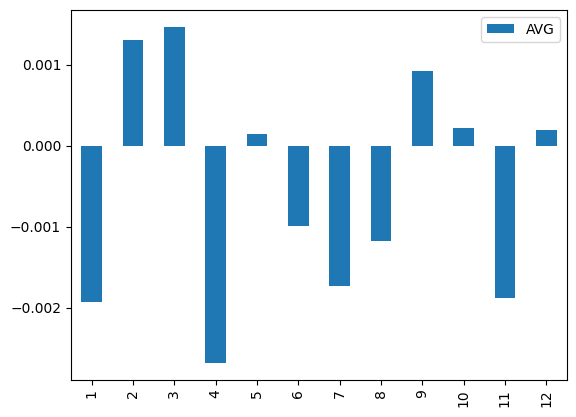

In [78]:
#Plot the average monthly returns
df_AVG.plot.bar()
